<a href="https://colab.research.google.com/github/awildt01/Zeitreihenanalyse-zur-Nachfrageprognose./blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=529)

In [ ]:
variaveis = ['sex_bin', 'Age']

In [ ]:
def tranformar_sex(valor):
  if valor == 'female':
    return 1
  else:
    return 0

In [ ]:
train['sex_bin'] = train['Sex'].map(tranformar_sex)

In [ ]:
train[variaveis]

,sex_bin,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,1,NaN
889,0,26.0


In [ ]:
x = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
modelo.fit(x,y)

RandomForestClassifier(n_jobs=-1, random_state=529)

In [ ]:
x_prev = test[variaveis]

KeyError: "['sex_bin'] not in index"

In [ ]:
test['sex_bin'] = test['Sex'].map(tranformar_sex)

In [ ]:
x_prev = test[variaveis].fillna(-1)

x_prev

,sex_bin,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0
...,...,...
413,0,-1.0
414,1,39.0
415,0,38.5
416,0,-1.0


In [ ]:
x_prev.head()

,sex_bin,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [ ]:
p = modelo.predict(x_prev)
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.to_csv('primeiro modelo',header=False)

In [ ]:
sub.head(10)

PassengerId
892    0
893    1
894    0
895    0
896    1
897    0
898    1
899    0
900    1
901    0
Name: Survived, dtype: int64

In [ ]:
df = pd.DataFrame(p,
                  columns=["Survived"], index= test['PassengerId'])
df.to_csv('primeiro modelo')

In [ ]:
from sklearn.model_selection import train_test_split
# ?train_test_split

In [ ]:
X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.random.seed(0)
train_test_split(X_falso, test_size=0.2)

[array([4, 9, 1, 6, 7, 3, 0, 5]), array([2, 8])]

In [ ]:
train = pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

variaveis = ['sex_bin', 'Age']

def tranformar_sex(valor):
  if valor == 'female':
    return 1
  else:
    return 0

train['sex_bin'] = train['Sex'].map(tranformar_sex)

test['sex_bin'] = test['Sex'].map(tranformar_sex)

x = train[variaveis].fillna(-1)
y = train['Survived']

np.random.seed(1)

X_train, X_valid, Y_train, Y_valid = train_test_split(x,y, test_size=0.5 )

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=529)

modelo.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=529)

In [ ]:
p = modelo.predict(X_valid)

In [ ]:
np.mean(p == Y_valid) # comparando as previsoes com os resultados do dataset

0.7488789237668162

In [ ]:
# comparando com se todos as mulhres sobrevivencem
p = (X_valid['sex_bin'] == 1).astype(np.int64)
np.mean(Y_valid == p)

0.7623318385650224

## Cross validation
Aufteilung von der Dataset in Blöcke, es wird ein Resampling durchgefhür.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k = KFold(n_splits=3, random_state=0, shuffle=True)
# Kfold aufteilung von den index  in training Zeilen und Validation Zeilen

In [ ]:
X_falso = np.arange(10)
np.random.seed(0)
for zeile_train, zeile_valid in k.split(X_falso): # randomische aufteilunh in zwei blocks
  print('linha de treino',zeile_train)
  print('linha de valid',zeile_valid)
  print('#############')

linha de treino [0 1 3 5 6 7]
linha de valid [2 4 8 9]
#############
linha de treino [0 2 3 4 5 8 9]
linha de valid [1 6 7]
#############
linha de treino [1 2 4 6 7 8 9]
linha de valid [0 3 5]
#############


In [ ]:
k = KFold(n_splits=3, random_state=0, shuffle=True)
for zeile_train, zeile_valid in k.split(x,y): # randomische aufteilunh in zwei blocks
  print(' ')
  print('linha de treino',zeile_train.shape[0])
  print('linha de valid',zeile_valid.shape[0])
  print(' ')

  x_train , x_valid = x.iloc[zeile_train], x.iloc[zeile_valid]
  y_train, y_valid  = y.iloc[zeile_train], y.iloc[zeile_valid]
  print(x_train.head())

 
linha de treino 594
linha de valid 297
 
   sex_bin   Age
0        0  22.0
3        1  35.0
4        0  35.0
6        0  54.0
7        0   2.0
 
linha de treino 594
linha de valid 297
 
   sex_bin   Age
1        1  38.0
2        1  26.0
5        0  -1.0
8        1  27.0
9        1  14.0
 
linha de treino 594
linha de valid 297
 
   sex_bin   Age
0        0  22.0
1        1  38.0
2        1  26.0
3        1  35.0
4        0  35.0


In [ ]:
k = KFold(n_splits=3, random_state=0, shuffle=True)
resultados =[]


for zeile_train, zeile_valid in k.split(x,y): # randomische aufteilunh in zwei blocks
  print(' ')
  print('linha de treino',zeile_train.shape[0])
  print('linha de valid',zeile_valid.shape[0])
  print(' ')

  X_treino , X_valid = x.iloc[zeile_train], x.iloc[zeile_valid]
  y_treino, y_valid  = y.iloc[zeile_train], y.iloc[zeile_valid]

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  modelo.fit(X_treino, y_treino)

  p = modelo.predict(X_valid)

  acc = np.mean(y_valid == p)
  resultados.append(acc)
  print("Acc:", acc)
  print()
  #print(X_treino.head())
  #print()


 
linha de treino 594
linha de valid 297
 
Acc: 0.7609427609427609

 
linha de treino 594
linha de valid 297
 
Acc: 0.7845117845117845

 
linha de treino 594
linha de valid 297
 
Acc: 0.7643097643097643



In [ ]:
resultados

[0.7609427609427609, 0.7845117845117845, 0.7643097643097643]

In [ ]:
np.mean(resultados)

0.7699214365881032

In [ ]:
# die Datenset wird in zwei Block aufgeteilt und wird 4 mal wiederholt. random_stade wird in eine schleife Seed repitte kfold. 4 wiederholen und 2 aufteilung
# die Beispiel von jeden Block werden sich verändert.

resultados = []
for rep in range(4):
    print("Rep:", rep)
    kf = KFold(2, shuffle=True, random_state=rep)

    for linhas_treino, linhas_valid in kf.split(x):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])

        X_treino, X_valid = x.iloc[linhas_treino], x.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(X_treino, y_treino)

        p = modelo.predict(X_valid)

        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acc:", acc)
        print()
        #print(X_treino.head())
        #print()

Rep: 0
Treino: 445
Valid: 446
Acc: 0.7713004484304933

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Rep: 1
Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7955056179775281

Rep: 2
Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Rep: 3
Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7573033707865169



In [ ]:
len(resultados)

6

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0


train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

In [ ]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7511210762331838

Treino: 446
Valid: 445
Acc: 0.7617977528089888

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7399103139013453

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7354260089686099

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7556053811659192

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7640449438202247



In [ ]:
np.mean(resultados) # auch Hist Grafik zeigen max und min

0.759601451100922

## neue variables

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [ ]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [ ]:
np.mean(resultados) # auch Hist Grafik zeigen max und min

0.8041457147175896

# Retreinar com todos os dados X e Y

In [ ]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [ ]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [ ]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Análise erro

In [ ]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [ ]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,...,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,...,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,...,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,...,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,...,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,...,NaN,S,1,0,1


In [ ]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [ ]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [ ]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


# Novas variaveis

In [ ]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [ ]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()

    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc:", acc)
    print()
    # print(X_treino

Treino: 445
Valid: 446
Acc: 0.8318385650224215

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8408071748878924

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8071748878923767

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8408071748878924

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8363228699551569

Treino: 446
Valid: 445
Acc: 0.8269662921348314



In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_binario,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,1,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
import pandas as pd ### comeco
import numpy as np

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender = pd.read_csv("/content/gender_submission.csv")

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.fillna(-1,inplace=True)
test.fillna(-1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S


In [ ]:
variable =['Sex_binar',"Age"]

In [ ]:
def transform(value):
  if "female" == value:
    return 1
  else:
    return 0

In [ ]:
train["Sex_binar"] = train["Sex"].map(transform)
test["Sex_binar"]  = test["Sex"].map(transform)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binar
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
variable =['Sex_binar',"Age"]

X = train[variable] # shape 891
y = train["Survived"] # shape 981

In [ ]:
np.random.seed(1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.5)

# X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [ ]:
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_valid.shape',X_valid.shape)
print('y_valid.shape',y_valid.shape)

X_train.shape (445, 2)
y_train.shape (445,)
X_valid.shape (446, 2)
y_valid.shape (446,)


In [ ]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [ ]:
p = model.predict(X_valid)
#p = modelo.predict(X_valid)

np.mean(y_valid == p)

0.7466367713004485

In [ ]:
len(p)

446

In [ ]:
y_valid.shape

(446,)

In [ ]:
p.shape

(446,)

In [ ]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender = pd.read_csv("/content/gender_submission.csv")

train.fillna(-1,inplace=True)
test.fillna(-1, inplace=True)


def sextramsform (valor):
  if valor == 'female':
    return 1
  else:
    return 0

train['sex_bina'] = train['Sex'].map(sextramsform)

variable =['sex_bina','Age']

X = train[variable]
y = train['Survived']

# train.fillna(-1,inplace=True)
# test.fillna(-1, inplace=True)

In [ ]:
X.shape

(891, 2)

In [ ]:
y.shape

(891,)

# Validatacao cruzada

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
#?KFold

In [ ]:
KF = KFold(n_splits=2, random_state=0, shuffle=True)

for linhas_train, linhas_valid in KF.split(X):
  print('linhas_train',linhas_train.shape[0])
  print(linhas_train)
  print('linhas_valid', linhas_valid.shape[0])
  print(linhas_valid)

  print('####')
 # print(linhas_valid)

linhas_train 445
[  3   4   7   9  11  13  16  19  23  24  25  26  28  29  32  33  36  41
  42  43  44  47  53  56  57  58  59  61  63  67  69  70  72  73  80  82
  83  84  86  87  88  91  93  94  95  98  99 106 110 111 112 114 115 117
 119 120 121 123 125 126 128 129 130 131 134 135 136 137 138 139 143 146
 147 148 149 151 152 153 160 163 164 166 168 169 174 176 177 180 182 183
 184 186 189 191 192 195 197 199 201 203 207 209 212 213 216 217 219 221
 224 225 226 227 228 232 234 237 244 246 248 254 256 257 259 260 265 269
 273 274 275 276 277 280 281 282 284 286 287 288 289 290 291 292 295 296
 297 300 305 307 314 321 322 323 324 325 326 328 329 330 332 335 336 339
 340 341 343 347 348 349 353 355 357 359 360 365 368 369 370 371 373 376
 377 381 383 385 387 388 393 394 396 398 400 404 405 407 410 411 414 415
 417 419 421 423 426 427 429 430 431 433 435 437 438 442 444 445 446 448
 449 450 454 455 459 461 463 464 466 468 469 470 472 473 478 480 486 488
 490 497 498 499 502 504 507 508 5

In [ ]:
X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

k = KFold(n_splits=2, random_state=0, shuffle=True)
for linha_1, linha_2 in k.split(X_falso):
  print('treino',linha_1)
  print('valid',linha_2)
  print(' ')


treino [0 3 5 6 7]
valid [1 2 4 8 9]
 
treino [1 2 4 8 9]
valid [0 3 5 6 7]
 


In [ ]:
for rep in range(2) :
  kf = KFold(n_splits = 2 , shuffle = True, random_state=rep)
  for linhas_train, linhas_valid in kf.split(X_falso):
    print('treino',linhas_train)
    print('valid',linhas_valid)
    print('')

treino [0 3 5 6 7]
valid [1 2 4 8 9]

treino [1 2 4 8 9]
valid [0 3 5 6 7]

treino [1 3 5 7 8]
valid [0 2 4 6 9]

treino [0 2 4 6 9]
valid [1 3 5 7 8]



In [ ]:
RK = RepeatedKFold (n_splits=2, n_repeats=2, random_state= 0)
for linha_1, linha_2 in RK.split(X_falso):
  print('treino',linha_1)
  print('valid',linha_2)
  print(' ')


treino [0 3 5 6 7]
valid [1 2 4 8 9]
 
treino [1 2 4 8 9]
valid [0 3 5 6 7]
 
treino [0 4 6 7 8]
valid [1 2 3 5 9]
 
treino [1 2 3 5 9]
valid [0 4 6 7 8]
 


In [ ]:
from sklearn.model_selection import LeaveOneOut
X = [10,20,30,40,50,60,70,80,90,100]

l = LeaveOneOut()

for train, test in l.split(X_falso):
    print('train',train)
    print('test',test)
    print(' ')

train [1 2 3 4 5 6 7 8 9]
test [0]
 
train [0 2 3 4 5 6 7 8 9]
test [1]
 
train [0 1 3 4 5 6 7 8 9]
test [2]
 
train [0 1 2 4 5 6 7 8 9]
test [3]
 
train [0 1 2 3 5 6 7 8 9]
test [4]
 
train [0 1 2 3 4 6 7 8 9]
test [5]
 
train [0 1 2 3 4 5 7 8 9]
test [6]
 
train [0 1 2 3 4 5 6 8 9]
test [7]
 
train [0 1 2 3 4 5 6 7 9]
test [8]
 
train [0 1 2 3 4 5 6 7 8]
test [9]
 


In [ ]:

# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_blobs(n_samples=100, random_state=1)
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
 # split data
 X_train, X_test = X[train_ix, :], X[test_ix, :]
 y_train, y_test = y[train_ix], y[test_ix]
 # fit model
 model = RandomForestClassifier(random_state=1)
 model.fit(X_train, y_train)
 # evaluate model
 yhat = model.predict(X_test)
 # store
 y_true.append(y_test[0])
 y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.990


In [ ]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
  print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


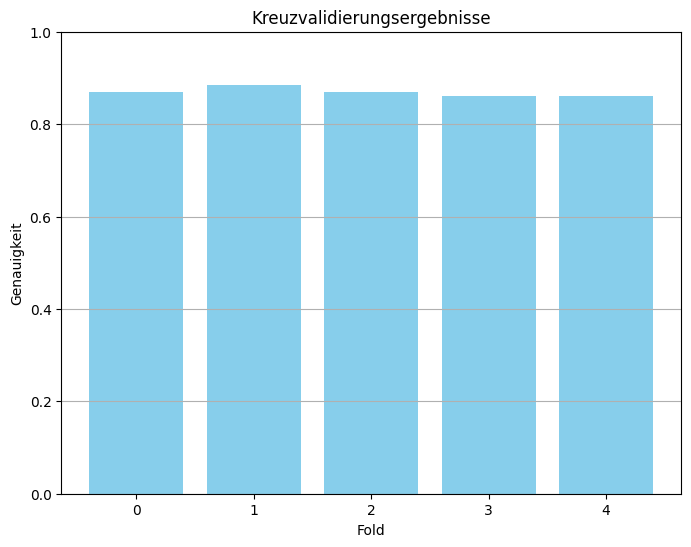

Durchschnittliche Genauigkeit: 0.87
Standardabweichung der Genauigkeit: 0.01


In [ ]:

# Bei der Kreuzvalidierung (Cross-Validation) können wir Overfitting identifizieren,
# indem wir die Leistung des Modells auf den verschiedenen Folds überprüfen und sicherstellen,
# dass das Modell konsistente Leistung über alle Folds hinweg aufweist. Hier ist ein Beispiel, wie wir dies tun können:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Erzeugen von Beispieldaten
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialisierung des Modells
model = LogisticRegression(max_iter=1000)

# Festlegen der Kreuzvalidierungsmethode (hier: Stratified K-Fold mit 5 Folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Durchführung der Kreuzvalidierung und Berechnung der Genauigkeit für jeden Fold
cv_scores = cross_val_score(model, X, y, cv=cv)

# Plotten der Genauigkeit für jeden Fold
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(cv_scores)), cv_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Genauigkeit')
plt.title('Kreuzvalidierungsergebnisse')
plt.ylim(0, 1)
plt.xticks(np.arange(len(cv_scores)))
plt.grid(axis='y')
plt.show()

# Berechnung des Durchschnitts und der Standardabweichung der Genauigkeit über alle Folds
print(f"Durchschnittliche Genauigkeit: {np.mean(cv_scores):.2f}")
print(f"Standardabweichung der Genauigkeit: {np.std(cv_scores):.2f}")


# In diesem Beispiel verwenden wir die Logistic Regression und die Stratified K-Fold Kreuzvalidierung mit 5 Folds.
# Wir führen die Kreuzvalidierung durch und berechnen die Genauigkeit für jeden Fold. Anschließend plotten wir die Genauigkeit für jeden Fold, um zu überprüfen,
# ob das Modell konsistente Leistung über alle Folds hinweg aufweist.

# Zusätzlich berechnen wir den Durchschnitt und die Standardabweichung der Genauigkeit über alle Folds,
# um eine Zusammenfassung der Leistung des Modells zu erhalten. Wenn das Modell überangepasst ist,
# wird die Genauigkeit zwischen den Folds stark variieren, was durch eine hohe Standardabweichung gekennzeichnet ist.
# In diesem Fall könnten Regulierungstechniken oder andere Maßnahmen ergriffen werden, um Overfitting zu reduzieren.


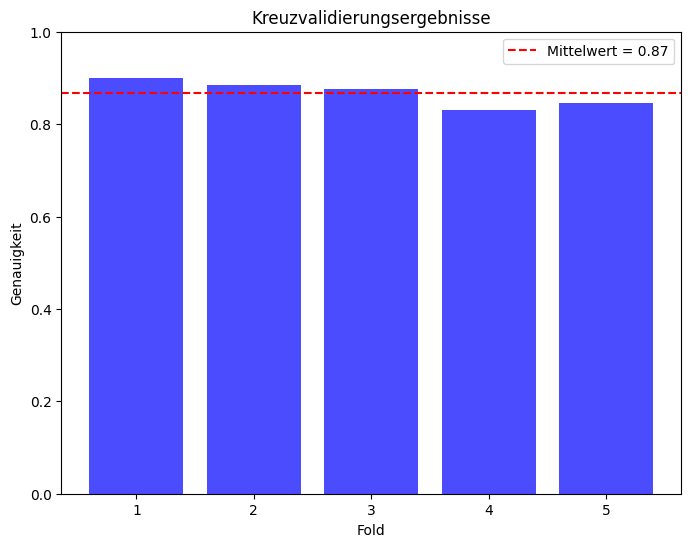

In [ ]:
# In diesem Beispiel führen wir eine 5-fache Kreuzvalidierung durch,
# indem wir das Modell auf fünf verschiedenen Teilmengen der Daten trainieren und auf den jeweils anderen Teilmengen validieren.
# Wir berechnen dann die Genauigkeit des Modells für jeden Fold und plotten diese auf einer Balkendiagramm.

# Die rote gestrichelte Linie zeigt den Durchschnitt der Genauigkeitswerte über alle Folds an.
#  Wenn das Modell anfängt, sich an die Trainingsdaten zu überpassen (Overfitting), kann dies daran erkannt werden,
# dass die Leistung des Modells auf den Validierungsdaten (blauen Balken) niedriger ist als der Durchschnitt (rote Linie). Dies kann auf eine Überanpassung hinweisen.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Erzeugen von Beispieldaten
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialisierung des Modells
model = LogisticRegression(max_iter=1000)

# Durchführen der Kreuzvalidierung über verschiedene Folds
cv_scores = cross_val_score(model, X, y, cv=5)

# Durchschnittliche Leistung über alle Folds
mean_score = np.mean(cv_scores)

# Plotten der Kreuzvalidierungsergebnisse
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='blue', alpha=0.7)
plt.axhline(y=mean_score, color='red', linestyle='--', label=f'Mittelwert = {mean_score:.2f}')
plt.xlabel('Fold')
plt.ylabel('Genauigkeit')
plt.title('Kreuzvalidierungsergebnisse')
plt.legend()
plt.ylim(0, 1)
plt.show()


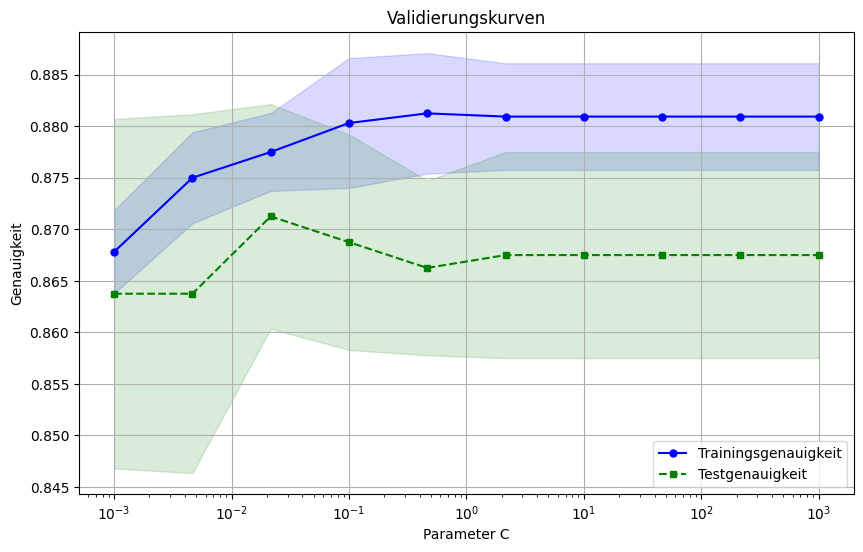

In [ ]:
# In diesem Beispiel verwenden wir die Logistic Regression und variieren den Parameter C (die Invers der Regularisierungsstärke).
#Wir berechnen dann die Trainings- und Testgenauigkeit über verschiedene Werte von C und plotten diese auf den Validierungskurven.

# Die Kurven zeigen die Trainingsgenauigkeit und Testgenauigkeit als Funktion des Parameters C. Wenn das Modell anfängt, sich an die Trainingsdaten zu überpassen (Overfitting),
# wird die Trainingsgenauigkeit steigen, während die Testgenauigkeit abnehmen oder sich stabilisieren wird. Dies kann auf den Validierungskurven beobachtet werden.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LogisticRegression

# Erzeugen von Beispieldaten
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des Modells
model = LogisticRegression(max_iter=1000)

# Festlegung der Parameter, die wir im Validierungskurvenplot variieren möchten
param_range = np.logspace(-3, 3, 10)

# Berechnung der Validierungskurven für den gewählten Parameter (hier: Regularisierungsstärke C)
train_scores, test_scores = validation_curve(model, X_train, y_train, param_name="C", param_range=param_range, cv=5)

# Berechnung des Durchschnitts und der Standardabweichung der Trainings- und Testgenauigkeit über die Folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotten der Validierungskurven
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Trainingsgenauigkeit')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testgenauigkeit')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Genauigkeit')
plt.title('Validierungskurven')
plt.legend(loc='lower right')
plt.show()


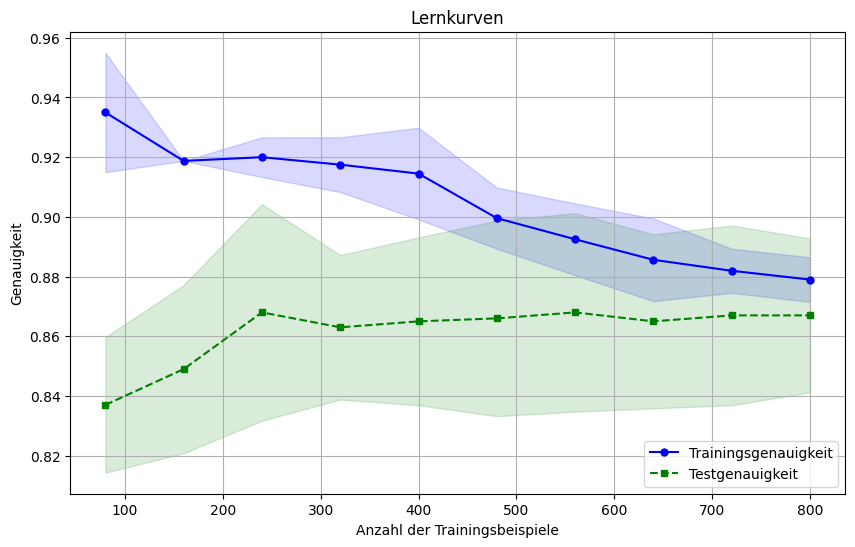

In [ ]:

# Um Overfitting anhand von Lernkurven zu identifizieren, können wir die Leistung des Modells auf Trainings- und Testdaten über verschiedene Trainingsgrößen beobachten.
# Hier ist ein Beispiel, das die Lernkurven verwendet, um Overfitting zu erkennen:

# In diesem Beispiel verwenden wir die Funktion learning_curve aus der scikit-learn-Bibliothek, um die Lernkurven zu berechnen.
#Wir variieren die Größe des Trainingsdatensatzes und berechnen dann die Trainings- und Testgenauigkeit des Modells über verschiedene Trainingsgrößen.

# Die Kurven zeigen die Trainingsgenauigkeit und Testgenauigkeit als Funktion der Anzahl der Trainingsbeispiele. Wenn das Modell anfängt, sich an die Trainingsdaten zu überpassen (Overfitting),
# wird die Trainingsgenauigkeit steigen, während die Testgenauigkeit abnehmen oder sich stabilisieren wird. Dies kann auf den Lernkurven beobachtet werden.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Erzeugen von Beispieldaten
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialisierung des Modells
model = LogisticRegression(max_iter=1000)

# Berechnung der Lernkurven
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Berechnung des Durchschnitts und der Standardabweichung der Trainings- und Testgenauigkeit über die Folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotten der Lernkurven
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Trainingsgenauigkeit')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testgenauigkeit')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Anzahl der Trainingsbeispiele')
plt.ylabel('Genauigkeit')
plt.title('Lernkurven')
plt.legend(loc='lower right')
plt.show()
